# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("chronic_desease.csv")

In [3]:
df

,Name,Age,Gender,BMI,Smoker,ChronicDisease,RiskLevel,InsuranceCost
0,Person_1,56,Male,33.0,Yes,1,High,36268.0
1,Person_2,46,Female,27.8,No,1,Medium,28618.0
2,Person_3,32,Female,24.0,Yes,0,Low,19763.0
3,Person_4,60,Female,39.9,No,0,Low,18311.0
4,Person_5,25,Male,27.4,No,0,Low,11893.0
...,...,...,...,...,...,...,...,...
995,Person_996,22,Male,20.4,No,0,Low,9738.0
996,Person_997,40,Male,27.3,Yes,0,Low,22997.0
997,Person_998,27,Female,18.9,No,1,Low,24105.0
998,Person_999,61,Male,34.3,No,0,Low,20626.0


In [4]:
df['Gender'] = df['Gender'].map({
    "Male": 1,
    "Female": 0
}).astype(int)

In [5]:
df['RiskLevel'] = df['RiskLevel'].map({
    "Low": 0,
    "Medium": 1,
    "High": 2
}).astype(int)

In [6]:
df['Smoker'] = df['Smoker'].map({
    "Yes" : 1,
    "No" : 0
}).astype(int)

In [7]:
df

,Name,Age,Gender,BMI,Smoker,ChronicDisease,RiskLevel,InsuranceCost
0,Person_1,56,1,33.0,1,1,2,36268.0
1,Person_2,46,0,27.8,0,1,1,28618.0
2,Person_3,32,0,24.0,1,0,0,19763.0
3,Person_4,60,0,39.9,0,0,0,18311.0
4,Person_5,25,1,27.4,0,0,0,11893.0
...,...,...,...,...,...,...,...,...
995,Person_996,22,1,20.4,0,0,0,9738.0
996,Person_997,40,1,27.3,1,0,0,22997.0
997,Person_998,27,0,18.9,0,1,0,24105.0
998,Person_999,61,1,34.3,0,0,0,20626.0


In [8]:
df = df.drop('Name', axis=1)

# Classification

In [9]:
df

,Age,Gender,BMI,Smoker,ChronicDisease,RiskLevel,InsuranceCost
0,56,1,33.0,1,1,2,36268.0
1,46,0,27.8,0,1,1,28618.0
2,32,0,24.0,1,0,0,19763.0
3,60,0,39.9,0,0,0,18311.0
4,25,1,27.4,0,0,0,11893.0
...,...,...,...,...,...,...,...
995,22,1,20.4,0,0,0,9738.0
996,40,1,27.3,1,0,0,22997.0
997,27,0,18.9,0,1,0,24105.0
998,61,1,34.3,0,0,0,20626.0


In [10]:
x = df.drop(['RiskLevel' ,'InsuranceCost'], axis=1)
y = df['RiskLevel']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [13]:
model.fit(x, y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [14]:
y_pred = model.predict(x_test)

In [15]:
model.score(x_train, y_train)

1.0

In [16]:
model.score(x_test, y_test)

1.0

In [17]:
accuracy_score(y_test, y_pred)

1.0

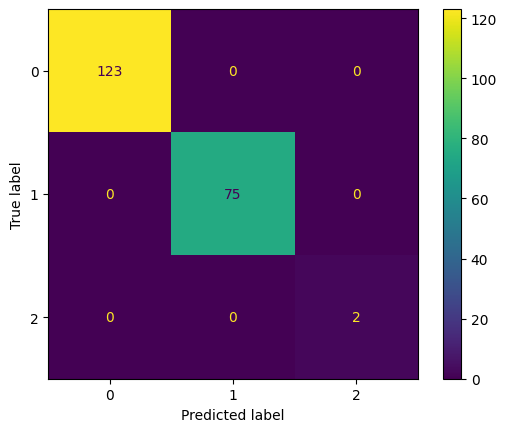

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [19]:
for depth in [2, 4, 6, 8, None]:
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        random_state=42
    )
    
    model.fit(x_train, y_train)
    
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    
    print(f"max_depth={depth} | Train={train_acc:.3f} | Test={test_acc:.3f}")

max_depth=2 | Train=0.820 | Test=0.855
max_depth=4 | Train=0.966 | Test=0.980
max_depth=6 | Train=0.998 | Test=0.990
max_depth=8 | Train=1.000 | Test=0.990
max_depth=None | Train=1.000 | Test=0.990


# Regression

In [20]:
x = df.drop(['RiskLevel' ,'InsuranceCost'], axis=1)
y = df['InsuranceCost']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [23]:
model.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [24]:
y_pred = model.predict(x_test)

In [25]:
r2_score(y_test, y_pred)

0.9660584955192559

In [26]:
model.score(x_train, y_train)

0.9947998499694576

In [27]:
model.score(x_test, y_test)

0.9660584955192559

In [28]:
for depth in [2, 4, 6, 8, None]:
    model = RandomForestRegressor(
        n_estimators=100,
        max_depth=depth,
        random_state=42
    )
    
    model.fit(x_train, y_train)
    
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    
    print(f"max_depth={depth} | Train={train_acc:.3f} | Test={test_acc:.3f}")

max_depth=2 | Train=0.860 | Test=0.873
max_depth=4 | Train=0.962 | Test=0.961
max_depth=6 | Train=0.980 | Test=0.969
max_depth=8 | Train=0.988 | Test=0.968
max_depth=None | Train=0.995 | Test=0.966


In [29]:
df

,Age,Gender,BMI,Smoker,ChronicDisease,RiskLevel,InsuranceCost
0,56,1,33.0,1,1,2,36268.0
1,46,0,27.8,0,1,1,28618.0
2,32,0,24.0,1,0,0,19763.0
3,60,0,39.9,0,0,0,18311.0
4,25,1,27.4,0,0,0,11893.0
...,...,...,...,...,...,...,...
995,22,1,20.4,0,0,0,9738.0
996,40,1,27.3,1,0,0,22997.0
997,27,0,18.9,0,1,0,24105.0
998,61,1,34.3,0,0,0,20626.0


In [30]:
df.to_csv("chronic_desease_cleaned.csv", index=False)